In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
full_song_data = pd.read_csv('full_song_data.csv')
full_song_data.columns

Index(['track_id', 'href', 'track_link', 'track_name', 'artist', 'album_name',
       'album_release_year', 'track_duration', 'album_image', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'hot_or_not'],
      dtype='object')

In [3]:
X = pd.DataFrame(full_song_data)
X = X.drop(['track_id', 'href', 'track_link', 'track_name', 'artist', 'album_name',
       'album_release_year', 'album_image', 'hot_or_not' ], axis=1)

In [4]:
X.describe()

,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,5.562000e+03,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000
mean,2.315310e+05,0.339880,0.551059,0.599478,0.175571,5.193276,0.198560,-9.641895,0.696152,0.093352,120.017015,3.882057,0.528980
std,1.008023e+05,0.340890,0.180867,0.256364,0.315257,3.563517,0.170054,4.975979,0.459959,0.127836,30.863459,0.431336,0.267104
min,7.133000e+03,0.000001,0.000000,0.000020,0.000000,0.000000,0.000000,-54.909000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.745330e+05,0.020400,0.429000,0.408000,0.000000,2.000000,0.095600,-12.234000,0.000000,0.035000,96.483500,4.000000,0.321000
50%,2.210000e+05,0.213500,0.562000,0.630000,0.000220,5.000000,0.132000,-8.634000,1.000000,0.046000,118.304000,4.000000,0.530000
75%,2.721278e+05,0.648000,0.687750,0.820000,0.165750,8.000000,0.254000,-6.131500,1.000000,0.083375,138.957500,4.000000,0.755750
max,1.610000e+06,0.996000,0.984000,0.999000,0.991000,11.000000,0.987000,0.316000,1.000000,0.956000,245.941000,5.000000,0.992000


In [5]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler_kmeans.pickle"

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,163854,0.4590,0.517,0.675,0.000000,6,0.1510,-5.382,1,0.0357,203.853,4,0.518
1,163854,0.4590,0.517,0.675,0.000000,6,0.1510,-5.382,1,0.0357,203.853,4,0.518
2,265493,0.1860,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,4,0.670
3,200454,0.0632,0.707,0.681,0.000005,0,0.0322,-4.325,1,0.0668,117.999,4,0.646
4,178426,0.1170,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564


,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.671444,0.349470,-0.188326,0.294618,-0.556964,0.226405,-0.279698,0.856169,0.660656,-0.451022,2.716595,0.273461,-0.041111
1,-0.671444,0.349470,-0.188326,0.294618,-0.556964,0.226405,-0.279698,0.856169,0.660656,-0.451022,2.716595,0.273461,-0.041111
2,0.336947,-0.451447,0.889911,0.013741,-0.556964,0.787698,-0.491415,0.828433,0.660656,-0.525343,-0.713627,0.273461,0.528006
3,-0.308324,-0.811713,0.862264,0.318024,-0.556948,-1.457476,-0.978362,1.068608,0.660656,-0.207719,-0.065391,0.273461,0.438146
4,-0.526870,-0.653877,0.005204,0.399946,-0.556899,1.068345,-0.550225,0.790849,0.660656,0.497938,1.619439,0.273461,0.131122


In [6]:
kmeans = KMeans(n_clusters=30, random_state=2405)
kmeans.fit(X_scaled_df)

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=30, random_state=2405)

In [7]:
X_scaled_df.describe()

,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03,5.562000e+03
mean,1.047546e-16,8.686966e-17,-1.175295e-16,1.686293e-16,-1.021996e-17,1.264720e-16,-2.222841e-16,-1.788493e-17,1.188070e-16,6.898473e-17,-1.047546e-16,-3.576986e-17,-2.797714e-16
std,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00
min,-2.226319e+00,-9.971237e-01,-3.047037e+00,-2.338519e+00,-5.569639e-01,-1.457476e+00,-1.167730e+00,-9.097942e+00,-1.513646e+00,-7.303127e-01,-3.888994e+00,-9.000881e+00,-1.980602e+00
25%,-5.654941e-01,-9.372784e-01,-6.749151e-01,-7.469654e-01,-5.569639e-01,-8.961828e-01,-6.055061e-01,-5.209704e-01,-1.513646e+00,-4.564988e-01,-7.625727e-01,2.734614e-01,-7.787167e-01
50%,-1.044811e-01,-3.707688e-01,6.049785e-02,1.190700e-01,-5.562644e-01,-5.424224e-02,-3.914375e-01,2.025703e-01,6.606564e-01,-3.704430e-01,-5.550802e-02,2.734614e-01,3.819311e-03
75%,4.027725e-01,9.039510e-01,7.558225e-01,8.602715e-01,-3.115523e-02,7.876983e-01,3.260452e-01,7.055315e-01,6.606564e-01,-7.804879e-02,6.137416e-01,2.734614e-01,8.490706e-01
max,1.367620e+01,1.924900e+00,2.393913e+00,1.558561e+00,2.586785e+00,1.629639e+00,4.636822e+00,2.001373e+00,6.606564e-01,6.748719e+00,4.080402e+00,2.592047e+00,1.733636e+00


In [8]:
clusters = kmeans.predict(X_scaled_df)

pd.Series(clusters).value_counts().sort_index() 

0     297
1     143
2     277
3     364
4      39
5     256
6      31
7     251
8     112
9     191
10     99
11    228
12    268
13    225
14     48
15    201
16    316
17    191
18     45
19    102
20    258
21    288
22    115
23    185
24    199
25    154
26    268
27    174
28    194
29     43
dtype: int64

In [9]:
X["cluster"] = clusters
X.head()

,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,163854,0.4590,0.517,0.675,0.000000,6,0.1510,-5.382,1,0.0357,203.853,4,0.518,13
1,163854,0.4590,0.517,0.675,0.000000,6,0.1510,-5.382,1,0.0357,203.853,4,0.518,13
2,265493,0.1860,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,3
3,200454,0.0632,0.707,0.681,0.000005,0,0.0322,-4.325,1,0.0668,117.999,4,0.646,0
4,178426,0.1170,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,5


In [10]:
X[X['cluster'] == 7].sample(5)

,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
5307,169866,0.000087,0.116,0.916,0.3510,4,0.3210,-9.628,1,0.0745,176.268,4,0.320,7
1179,200746,0.002740,0.426,0.904,0.0000,2,0.3500,-2.889,1,0.0529,142.006,4,0.510,7
5178,99000,0.352000,0.462,0.994,0.0623,1,0.2250,-5.560,1,0.0973,105.837,4,0.266,7
1430,275266,0.109000,0.440,0.776,0.5070,2,0.3650,-6.661,1,0.0356,134.009,4,0.367,7
1447,241000,0.000032,0.332,0.970,0.0249,1,0.0601,-3.611,1,0.0714,129.963,4,0.305,7


In [11]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns[:-1])

,track_duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,213974.882155,0.120861,0.669458,0.823404,0.056556,1.653199,0.174360,-6.331589,1.000000e+00,0.080454,117.338327,4.003367,0.779125
1,195234.461538,0.856776,0.314232,0.203789,0.494642,4.811189,0.174465,-16.945294,6.993007e-01,0.045622,98.131210,3.000000,0.207871
2,236491.321300,0.729369,0.425534,0.276367,0.035779,3.747292,0.170423,-13.180693,9.963899e-01,0.038382,112.669011,4.025271,0.269348
3,219863.181319,0.221929,0.712615,0.663975,0.035946,8.148352,0.140342,-8.838198,1.000000e+00,0.066338,114.948151,3.997253,0.836297
4,204299.025641,0.742949,0.506026,0.630256,0.000147,5.589744,0.759077,-13.168179,7.948718e-01,0.873051,98.936308,3.487179,0.440795
5,206468.085938,0.040225,0.409988,0.869801,0.033277,8.171875,0.204551,-5.638039,1.000000e+00,0.073021,137.182879,4.011719,0.545430
6,852847.612903,0.500858,0.426426,0.374868,0.324275,5.903226,0.216945,-15.437065,7.741935e-01,0.170558,111.698935,3.870968,0.320729
7,232370.151394,0.045820,0.394418,0.834494,0.042428,1.800797,0.188569,-5.537355,1.000000e+00,0.080473,135.593665,4.011952,0.353854
8,478235.830357,0.078377,0.496500,0.785339,0.256499,5.250000,0.160588,-7.724643,1.875000e-01,0.051862,127.081196,3.973214,0.359988
9,227336.732984,0.826271,0.311514,0.150789,0.821521,4.617801,0.139873,-21.641764,6.596859e-01,0.046747,103.197408,4.000000,0.119981


In [12]:
kmeans.inertia_ 

29461.029842373762

In [13]:
kmeans2 = KMeans(n_clusters=10, 
                init="random",
                n_init=5, 
                max_iter=5,
                tol=4, 
                algorithm="elkan",
                random_state=2405)

kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

42960.10821669282


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 93871.87320650113.
Iteration 1, inertia 62333.49938215838.
Iteration 2, inertia 61754.05749381501.
Iteration 3, inertia 61660.9129632353.
Iteration 4, inertia 61632.58009398.
Iteration 5, inertia 61624.54588426095.
Iteration 6, inertia 61618.352352982685.
Iteration 7, inertia 61616.70313712847.
Iteration 8, inertia 61616.242760813795.
Converged at iteration 8: center shift 4.2625057738851155e-05 within tolerance 9.999999999999881e-05.
Initialization complete


C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 118688.32991236959.
Iteration 1, inertia 67439.46820617904.
Iteration 2, inertia 66314.30886863674.
Iteration 3, inertia 65178.87059624412.
Iteration 4, inertia 64342.990625417704.
Iteration 5, inertia 63428.88048725745.
Iteration 6, inertia 62496.71681181894.
Iteration 7, inertia 61932.66507810558.
Iteration 8, inertia 61683.16376068886.
Iteration 9, inertia 61627.20212913238.
Iteration 10, inertia 61620.26102745738.
Iteration 11, inertia 61617.58089387393.
Iteration 12, inertia 61616.60969993833.
Iteration 13, inertia 61616.1792940341.
Converged at iteration 13: center shift 4.113799177034615e-06 within tolerance 9.999999999999881e-05.
Initialization complete
Iteration 0, inertia 98851.02959916746.
Iteration 1, inertia 67022.08932517114.
Iteration 2, inertia 64511.849058584805.
Iteration 3, inertia 62971.43140960857.
Iteration 4, inertia 62163.88381575223.
Iteration 5, inertia 61825.34521609368.
Iteration 6, inertia 61697.52303667412.
Iteration 7, inertia 61669.8

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 79912.07687085184.
Iteration 1, inertia 60451.145991714184.
Iteration 2, inertia 58822.04877258933.
Iteration 3, inertia 57845.18973982475.
Iteration 4, inertia 57236.32424150465.
Iteration 5, inertia 56939.93295816649.
Iteration 6, inertia 56799.243502028534.
Iteration 7, inertia 56686.56426440146.
Iteration 8, inertia 56642.38261161429.
Iteration 9, inertia 56625.53577479941.
Iteration 10, inertia 56613.40599913185.
Iteration 11, inertia 56606.575430167315.
Iteration 12, inertia 56604.41257477106.
Iteration 13, inertia 56603.40094561558.
Iteration 14, inertia 56602.736186018454.
Converged at iteration 14: center shift 2.316267875939675e-05 within tolerance 9.999999999999881e-05.
Initialization complete
Iteration 0, inertia 92093.57224521344.
Iteration 1, inertia 63724.421655773884.
Iteration 2, inertia 60928.04190993761.
Iteration 3, inertia 58404.68603433554.
Iteration 4, inertia 57571.20401434688.
Iteration 5, inertia 57277.07755671543.
Iteration 6, inertia 570

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 16, inertia 53983.885072493336.
Converged at iteration 16: center shift 4.144115960026361e-05 within tolerance 9.999999999999881e-05.
Initialization complete
Iteration 0, inertia 83988.34363183727.
Iteration 1, inertia 58343.07192881161.
Iteration 2, inertia 56389.85930749781.
Iteration 3, inertia 55719.63617569771.
Iteration 4, inertia 55450.00041718417.
Iteration 5, inertia 55293.72808791023.
Iteration 6, inertia 55154.30344296317.
Iteration 7, inertia 55025.664504183624.
Iteration 8, inertia 54880.653547520116.
Iteration 9, inertia 54645.8124145684.
Iteration 10, inertia 54301.348250223506.
Iteration 11, inertia 53852.89189044437.
Iteration 12, inertia 53512.21881414604.
Iteration 13, inertia 53322.06825267137.
Iteration 14, inertia 53225.81347308772.
Iteration 15, inertia 53161.240107287966.
Iteration 16, inertia 53121.812750057594.
Iteration 17, inertia 53107.477145358906.
Iteration 18, inertia 53104.71404651365.
Iteration 19, inertia 53104.20590332647.
Iteration 20, ine

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 11, inertia 50659.205885538264.
Iteration 12, inertia 50644.35036841706.
Iteration 13, inertia 50637.026593546994.
Iteration 14, inertia 50633.59788183148.
Iteration 15, inertia 50632.561176006115.
Iteration 16, inertia 50631.359679853325.
Iteration 17, inertia 50630.696148550545.
Iteration 18, inertia 50630.23212261992.
Iteration 19, inertia 50630.05325910449.
Converged at iteration 19: center shift 2.5319549122181732e-05 within tolerance 9.999999999999881e-05.
Initialization complete
Iteration 0, inertia 72547.04522012627.
Iteration 1, inertia 53369.81287029685.
Iteration 2, inertia 52239.51502549982.
Iteration 3, inertia 51716.05007506377.
Iteration 4, inertia 51420.03554641361.
Iteration 5, inertia 51254.227018821795.
Iteration 6, inertia 51171.027999271966.
Iteration 7, inertia 51124.156585971745.
Iteration 8, inertia 51088.87336805427.
Iteration 9, inertia 51053.16454323957.
Iteration 10, inertia 51008.79455311989.
Iteration 11, inertia 50988.42550143486.
Iteration 12, 

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 73660.23604943645.
Iteration 1, inertia 51866.30222352467.
Iteration 2, inertia 51068.30821524085.
Iteration 3, inertia 50828.32382718459.
Iteration 4, inertia 50722.15133961252.
Iteration 5, inertia 50673.54576130628.
Iteration 6, inertia 50650.47383722673.
Iteration 7, inertia 50633.11010152449.
Iteration 8, inertia 50618.94454023331.
Iteration 9, inertia 50600.95532324365.
Iteration 10, inertia 50575.27164113594.
Iteration 11, inertia 50515.40809089402.
Iteration 12, inertia 50430.27598159465.
Iteration 13, inertia 50325.508745960484.
Iteration 14, inertia 50176.36897346772.
Iteration 15, inertia 49999.54774303891.
Iteration 16, inertia 49872.122788872744.
Iteration 17, inertia 49775.20569665307.
Iteration 18, inertia 49712.43362679476.
Iteration 19, inertia 49634.87888673881.
Iteration 20, inertia 49543.096603181046.
Iteration 21, inertia 49437.017731014486.
Iteration 22, inertia 49367.702790810625.
Iteration 23, inertia 49323.2218225078

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 68761.95712004715.
Iteration 1, inertia 49904.30332223927.
Iteration 2, inertia 47940.70433252323.
Iteration 3, inertia 47205.97053175021.
Iteration 4, inertia 46848.36225790759.
Iteration 5, inertia 46669.93340865076.
Iteration 6, inertia 46586.887739524915.
Iteration 7, inertia 46450.24336001527.
Iteration 8, inertia 46308.044369381954.
Iteration 9, inertia 46164.516333920015.
Iteration 10, inertia 46072.90903215558.
Iteration 11, inertia 46021.26259283099.
Iteration 12, inertia 45970.049494913066.
Iteration 13, inertia 45900.26895810898.
Iteration 14, inertia 45778.25415635238.
Iteration 15, inertia 45631.73393348361.
Iteration 16, inertia 45568.37020606109.
Iteration 17, inertia 45558.07713750114.
Iteration 18, inertia 45556.00401050882.
Iteration 19, inertia 45554.46222488344.
Iteration 20, inertia 45553.58111573613.
Iteration 21, inertia 45553.4270673552.
Converged at iteration 21: center shift 4.99478088710632e-05 within tolerance 9.999999999999881e-05.
Init

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 61222.729664981896.
Iteration 1, inertia 47323.56858673772.
Iteration 2, inertia 46125.778684682235.
Iteration 3, inertia 45675.490099769646.
Iteration 4, inertia 45379.487870436926.
Iteration 5, inertia 45208.201438440505.
Iteration 6, inertia 45087.49814729447.
Iteration 7, inertia 44987.63379623048.
Iteration 8, inertia 44922.80444873404.
Iteration 9, inertia 44786.60699998554.
Iteration 10, inertia 44586.78573905241.
Iteration 11, inertia 44422.08034936077.
Iteration 12, inertia 44304.75688225615.
Iteration 13, inertia 44221.39589415524.
Iteration 14, inertia 44172.90990291696.
Iteration 15, inertia 44137.82529662095.
Iteration 16, inertia 44117.74575783935.
Iteration 17, inertia 44092.20765119363.
Iteration 18, inertia 44049.895533162766.
Iteration 19, inertia 43975.42104692209.
Iteration 20, inertia 43862.42861543717.
Iteration 21, inertia 43766.303827405674.
Iteration 22, inertia 43705.72135573148.
Iteration 23, inertia 43696.17426334953.
Iteration 24, inert

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 57891.734568997956.
Iteration 1, inertia 47353.6687925394.
Iteration 2, inertia 45465.04888519669.
Iteration 3, inertia 44573.76916708061.
Iteration 4, inertia 44199.21062479718.
Iteration 5, inertia 44011.64728168861.
Iteration 6, inertia 43815.908513425544.
Iteration 7, inertia 43640.860358197126.
Iteration 8, inertia 43451.421736680306.
Iteration 9, inertia 43279.66685630694.
Iteration 10, inertia 43199.94323593519.
Iteration 11, inertia 43163.55501741545.
Iteration 12, inertia 43143.43941952633.
Iteration 13, inertia 43133.870547535684.
Iteration 14, inertia 43126.21620255673.
Iteration 15, inertia 43119.34342248848.
Iteration 16, inertia 43110.52092867803.
Iteration 17, inertia 43102.45773854389.
Iteration 18, inertia 43086.14354798443.
Iteration 19, inertia 43071.646724786144.
Iteration 20, inertia 43058.26564407356.
Iteration 21, inertia 43031.482446881615.
Iteration 22, inertia 42988.90753696494.
Iteration 23, inertia 42964.072216459695.
Iteration 24, inert

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 59238.57702643059.
Iteration 1, inertia 44331.231143243655.
Iteration 2, inertia 42877.05735333539.
Iteration 3, inertia 42217.22384585477.
Iteration 4, inertia 41634.20698873246.
Iteration 5, inertia 41210.6415893155.
Iteration 6, inertia 40907.43642487825.
Iteration 7, inertia 40673.16755000929.
Iteration 8, inertia 40552.7819342039.
Iteration 9, inertia 40520.23933222348.
Iteration 10, inertia 40505.88496968965.
Iteration 11, inertia 40500.761488494994.
Iteration 12, inertia 40498.40558395755.
Iteration 13, inertia 40497.52053417578.
Iteration 14, inertia 40496.93403040369.
Iteration 15, inertia 40496.50069164066.
Iteration 16, inertia 40495.95574648318.
Iteration 17, inertia 40495.901138604284.
Converged at iteration 17: center shift 3.789525033162658e-05 within tolerance 9.999999999999881e-05.
Initialization complete
Iteration 0, inertia 58670.59910932701.
Iteration 1, inertia 43444.04627247242.
Iteration 2, inertia 41675.09329483872.
Iteration 3, inertia 4125

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 58349.60081826353.
Iteration 1, inertia 44263.96257213305.
Iteration 2, inertia 42534.482348753154.
Iteration 3, inertia 41934.95445823856.
Iteration 4, inertia 41617.89130676458.
Iteration 5, inertia 41432.28630502124.
Iteration 6, inertia 41300.64541447489.
Iteration 7, inertia 41198.958547353424.
Iteration 8, inertia 41147.78848647573.
Iteration 9, inertia 41112.20886787855.
Iteration 10, inertia 41088.36289462878.
Iteration 11, inertia 41073.28114357026.
Iteration 12, inertia 41067.17351339407.
Iteration 13, inertia 41061.885609003395.
Iteration 14, inertia 41058.65724304888.
Iteration 15, inertia 41056.10981591155.
Iteration 16, inertia 41053.532207757824.
Iteration 17, inertia 41049.092981310765.
Iteration 18, inertia 41043.34281753356.
Iteration 19, inertia 41040.579084687095.
Iteration 20, inertia 41039.51102402776.
Iteration 21, inertia 41037.01611788106.
Iteration 22, inertia 41036.13306516572.
Iteration 23, inertia 41035.1551119452.
Iteration 24, inertia

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 19, inertia 38658.680568176365.
Iteration 20, inertia 38650.451661482075.
Iteration 21, inertia 38646.247598629925.
Iteration 22, inertia 38643.61276188521.
Iteration 23, inertia 38642.243526063314.
Iteration 24, inertia 38640.42568145878.
Iteration 25, inertia 38639.8014502334.
Iteration 26, inertia 38639.35819382155.
Iteration 27, inertia 38639.17680156802.
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 54113.10199591413.
Iteration 1, inertia 42937.96057128096.
Iteration 2, inertia 41111.56348214739.
Iteration 3, inertia 40166.108686038766.
Iteration 4, inertia 39822.75630913997.
Iteration 5, inertia 39701.14692244113.
Iteration 6, inertia 39624.80491228804.
Iteration 7, inertia 39568.443942922895.
Iteration 8, inertia 39520.05906873031.
Iteration 9, inertia 39472.569582900716.
Iteration 10, inertia 39419.438782742305.
Iteration 11, inertia 39362.967919932984.
Iteration 12, inertia 39299.68238553412.
Iteration 13, inertia 39212.1

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 53642.63500838254.
Iteration 1, inertia 42025.08127617388.
Iteration 2, inertia 40300.69098930097.
Iteration 3, inertia 39532.900900270346.
Iteration 4, inertia 38981.88142630281.
Iteration 5, inertia 38760.80168858219.
Iteration 6, inertia 38664.947959217345.
Iteration 7, inertia 38616.47588253867.
Iteration 8, inertia 38580.928885421235.
Iteration 9, inertia 38497.82153992441.
Iteration 10, inertia 38455.203547423334.
Iteration 11, inertia 38407.59780636918.
Iteration 12, inertia 38373.44681578061.
Iteration 13, inertia 38309.137550854146.
Iteration 14, inertia 38230.29414021983.
Iteration 15, inertia 38182.27815424578.
Iteration 16, inertia 38147.898126641165.
Iteration 17, inertia 38116.660426015325.
Iteration 18, inertia 38090.56004799385.
Iteration 19, inertia 38067.87402531928.
Iteration 20, inertia 38050.37599106882.
Iteration 21, inertia 38023.9551357469.
Iteration 22, inertia 38003.581105592835.
Iteration 23, inertia 37986.63712857527.
Iteration 24, inert

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 52181.26117555281.
Iteration 1, inertia 40577.40374145142.
Iteration 2, inertia 38423.529576554305.
Iteration 3, inertia 37636.81612972478.
Iteration 4, inertia 37291.03283099053.
Iteration 5, inertia 37100.739151808375.
Iteration 6, inertia 36991.806644349126.
Iteration 7, inertia 36929.75731109431.
Iteration 8, inertia 36881.2104724533.
Iteration 9, inertia 36845.77658621283.
Iteration 10, inertia 36823.2448603787.
Iteration 11, inertia 36810.89145672867.
Iteration 12, inertia 36801.00387191915.
Iteration 13, inertia 36792.745419442464.
Iteration 14, inertia 36787.1065839572.
Iteration 15, inertia 36784.45241131118.
Iteration 16, inertia 36783.23668860639.
Iteration 17, inertia 36782.126332602966.
Iteration 18, inertia 36780.894332937525.
Iteration 19, inertia 36779.96162851238.
Iteration 20, inertia 36779.77703993533.
Iteration 21, inertia 36779.65844826523.
Iteration 22, inertia 36779.580857358655.
Converged at iteration 22: strict convergence.
Initialization c

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 50408.82168178113.
Iteration 1, inertia 39985.97442266039.
Iteration 2, inertia 38544.01946000363.
Iteration 3, inertia 37706.42404905268.
Iteration 4, inertia 37311.483740660624.
Iteration 5, inertia 37120.79339280146.
Iteration 6, inertia 36989.78628402109.
Iteration 7, inertia 36911.98815010041.
Iteration 8, inertia 36868.854680666394.
Iteration 9, inertia 36846.08395774281.
Iteration 10, inertia 36835.36279393077.
Iteration 11, inertia 36829.55612083905.
Iteration 12, inertia 36825.90836804128.
Iteration 13, inertia 36821.76544383302.
Iteration 14, inertia 36819.353973453646.
Iteration 15, inertia 36817.35727697421.
Iteration 16, inertia 36816.57184449917.
Iteration 17, inertia 36815.541679184076.
Iteration 18, inertia 36814.69725975923.
Iteration 19, inertia 36808.76005871786.
Iteration 20, inertia 36806.90633521531.
Iteration 21, inertia 36804.813862334806.
Iteration 22, inertia 36804.14458247047.
Iteration 23, inertia 36803.7716197626.
Iteration 24, inertia 

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 50358.66998186081.
Iteration 1, inertia 38939.83731935316.
Iteration 2, inertia 37550.04985256599.
Iteration 3, inertia 37102.54998439683.
Iteration 4, inertia 36890.045304454674.
Iteration 5, inertia 36773.46576359871.
Iteration 6, inertia 36699.2190699169.
Iteration 7, inertia 36655.73582384451.
Iteration 8, inertia 36630.168826935274.
Iteration 9, inertia 36608.40685718936.
Iteration 10, inertia 36583.98217415009.
Iteration 11, inertia 36538.85226396976.
Iteration 12, inertia 36462.0426664696.
Iteration 13, inertia 36372.72708624504.
Iteration 14, inertia 36278.69122396472.
Iteration 15, inertia 36099.51222955657.
Iteration 16, inertia 35940.93771021925.
Iteration 17, inertia 35807.394989101405.
Iteration 18, inertia 35782.657880265084.
Iteration 19, inertia 35772.23117288557.
Iteration 20, inertia 35764.51117457567.
Iteration 21, inertia 35752.76434980492.
Iteration 22, inertia 35717.95674736286.
Iteration 23, inertia 35710.99081391457.
Iteration 24, inertia 35

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 48421.47590588909.
Iteration 1, inertia 38801.9454119242.
Iteration 2, inertia 37259.430463493096.
Iteration 3, inertia 36512.55231014697.
Iteration 4, inertia 36180.87468912477.
Iteration 5, inertia 35990.26423195748.
Iteration 6, inertia 35826.713062242925.
Iteration 7, inertia 35699.73318717175.
Iteration 8, inertia 35575.89343240836.
Iteration 9, inertia 35462.36641266872.
Iteration 10, inertia 35393.58870659253.
Iteration 11, inertia 35347.031311326304.
Iteration 12, inertia 35325.74346655842.
Iteration 13, inertia 35315.74417627639.
Iteration 14, inertia 35308.662676417625.
Iteration 15, inertia 35304.249593141896.
Iteration 16, inertia 35302.1188864899.
Iteration 17, inertia 35301.29552764128.
Iteration 18, inertia 35300.340642743664.
Iteration 19, inertia 35299.24103533945.
Iteration 20, inertia 35297.770613628774.
Iteration 21, inertia 35296.52350281905.
Iteration 22, inertia 35295.713240347395.
Iteration 23, inertia 35295.239075113954.
Iteration 24, inert

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 46784.48875569914.
Iteration 1, inertia 37565.446440359105.
Iteration 2, inertia 36061.04721375163.
Iteration 3, inertia 35380.23966577431.
Iteration 4, inertia 34935.41278987788.
Iteration 5, inertia 34753.69374342885.
Iteration 6, inertia 34699.95168772518.
Iteration 7, inertia 34676.46210629039.
Iteration 8, inertia 34666.78037717144.
Iteration 9, inertia 34662.58555802662.
Iteration 10, inertia 34659.853534089096.
Iteration 11, inertia 34658.532721134594.
Iteration 12, inertia 34657.4568631093.
Iteration 13, inertia 34656.90342307549.
Iteration 14, inertia 34656.33551033537.
Iteration 15, inertia 34656.17863365114.
Iteration 16, inertia 34656.064879775666.
Iteration 17, inertia 34655.988732887774.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 50067.959427220805.
Iteration 1, inertia 40261.518554445254.
Iteration 2, inertia 38383.77164614997.
Iteration 3, inertia 36969.21958749622.
Iteration 4, inertia 35941.34732903

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 48933.101896031665.
Iteration 1, inertia 37698.34195573161.
Iteration 2, inertia 36119.909162504926.
Iteration 3, inertia 35540.047638793534.
Iteration 4, inertia 35192.098892928494.
Iteration 5, inertia 34856.0485566477.
Iteration 6, inertia 34393.17561858442.
Iteration 7, inertia 34297.27127451433.
Iteration 8, inertia 34244.36951691814.
Iteration 9, inertia 34150.78721879784.
Iteration 10, inertia 34097.43287107287.
Iteration 11, inertia 34038.21105642957.
Iteration 12, inertia 33991.750350915165.
Iteration 13, inertia 33952.01119170316.
Iteration 14, inertia 33908.99794535815.
Iteration 15, inertia 33879.160328915124.
Iteration 16, inertia 33856.220557100954.
Iteration 17, inertia 33842.990542712476.
Iteration 18, inertia 33831.24364919505.
Iteration 19, inertia 33823.55989801155.
Iteration 20, inertia 33818.125549012446.
Iteration 21, inertia 33814.68890703757.
Iteration 22, inertia 33813.78557149502.
Iteration 23, inertia 33813.52985726057.
Iteration 24, iner

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 48210.62587063291.
Iteration 1, inertia 38181.23423362629.
Iteration 2, inertia 36967.536122219535.
Iteration 3, inertia 36136.39672984776.
Iteration 4, inertia 35440.40607780394.
Iteration 5, inertia 34900.831704850505.
Iteration 6, inertia 34497.06969251475.
Iteration 7, inertia 34238.713904930584.
Iteration 8, inertia 34086.24621776609.
Iteration 9, inertia 33999.8279482852.
Iteration 10, inertia 33950.52248479107.
Iteration 11, inertia 33912.919722964.
Iteration 12, inertia 33885.77043751539.
Iteration 13, inertia 33870.86314037593.
Iteration 14, inertia 33845.71519819832.
Iteration 15, inertia 33832.62355004338.
Iteration 16, inertia 33817.55698171948.
Iteration 17, inertia 33806.763183257135.
Iteration 18, inertia 33797.68918743778.
Iteration 19, inertia 33794.81504324185.
Iteration 20, inertia 33793.36096947482.
Iteration 21, inertia 33792.709277626804.
Iteration 22, inertia 33792.16124080689.
Iteration 23, inertia 33792.09071635824.
Converged at iteration 2

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 45622.20426848312.
Iteration 1, inertia 36329.52864803989.
Iteration 2, inertia 35077.90693913715.
Iteration 3, inertia 34699.453243784286.
Iteration 4, inertia 34415.376041340605.
Iteration 5, inertia 34144.10447438739.
Iteration 6, inertia 33922.92949036247.
Iteration 7, inertia 33804.779872341154.
Iteration 8, inertia 33716.71944312452.
Iteration 9, inertia 33617.47489233837.
Iteration 10, inertia 33524.925433626886.
Iteration 11, inertia 33456.90333548935.
Iteration 12, inertia 33404.323595997615.
Iteration 13, inertia 33362.85870869323.
Iteration 14, inertia 33343.392915815595.
Iteration 15, inertia 33334.48379712512.
Iteration 16, inertia 33330.82919066263.
Iteration 17, inertia 33328.68459202081.
Iteration 18, inertia 33327.93351618874.
Iteration 19, inertia 33326.91576218346.
Iteration 20, inertia 33326.551394868955.
Iteration 21, inertia 33326.13057191364.
Iteration 22, inertia 33325.49479719537.
Iteration 23, inertia 33325.10143287919.
Iteration 24, inert

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 45105.40134240176.
Iteration 1, inertia 36100.6770117264.
Iteration 2, inertia 34800.7418361493.
Iteration 3, inertia 34228.206959758936.
Iteration 4, inertia 33651.679062283525.
Iteration 5, inertia 33414.27587012868.
Iteration 6, inertia 33283.62701104085.
Iteration 7, inertia 33219.19412892115.
Iteration 8, inertia 33172.511156549364.
Iteration 9, inertia 33133.53400618176.
Iteration 10, inertia 33109.088118016036.
Iteration 11, inertia 33095.66429054182.
Iteration 12, inertia 33086.96728601556.
Iteration 13, inertia 33076.28281037346.
Iteration 14, inertia 33070.04752690786.
Iteration 15, inertia 33063.66253132175.
Iteration 16, inertia 33058.87791188542.
Iteration 17, inertia 33056.22569235257.
Iteration 18, inertia 33053.42780916476.
Iteration 19, inertia 33051.086123580935.
Iteration 20, inertia 33049.69312147927.
Iteration 21, inertia 33049.02381715854.
Iteration 22, inertia 33048.75025132939.
Iteration 23, inertia 33048.71326719235.

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 45035.8036410762.
Iteration 1, inertia 36242.20129584721.
Iteration 2, inertia 34803.641922047005.
Iteration 3, inertia 34033.60942152049.
Iteration 4, inertia 33526.038546783944.
Iteration 5, inertia 33097.5126737022.
Iteration 6, inertia 32864.13225915146.
Iteration 7, inertia 32754.438454646406.
Iteration 8, inertia 32678.799208076758.
Iteration 9, inertia 32624.18537154333.
Iteration 10, inertia 32481.988049166637.
Iteration 11, inertia 32374.061756730207.
Iteration 12, inertia 32299.04658082028.
Iteration 13, inertia 32278.792531376705.
Iteration 14, inertia 32270.737076168836.
Iteration 15, inertia 32263.0615548324.
Iteration 16, inertia 32255.836942423277.
Iteration 17, inertia 32245.002723510333.
Iteration 18, inertia 32237.458823816196.
Iteration 19, inertia 32232.479815600254.
Iteration 20, inertia 32227.04585253507.
Iteration 21, inertia 32219.005766728504.
Iteration 22, inertia 32212.686051784774.
Iteration 23, inertia 32202.2144

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 43257.1804404156.
Iteration 1, inertia 34700.665245503376.
Iteration 2, inertia 33554.67131967685.
Iteration 3, inertia 33094.25798330527.
Iteration 4, inertia 32876.87655526465.
Iteration 5, inertia 32778.48285832487.
Iteration 6, inertia 32716.374988324176.
Iteration 7, inertia 32671.949746530165.
Iteration 8, inertia 32644.195278577463.
Iteration 9, inertia 32626.302760758375.
Iteration 10, inertia 32615.988097964593.
Iteration 11, inertia 32602.980421973138.
Iteration 12, inertia 32588.958879983336.
Iteration 13, inertia 32580.044408958165.
Iteration 14, inertia 32571.66479812598.
Iteration 15, inertia 32562.558724480594.
Iteration 16, inertia 32549.261989953746.
Iteration 17, inertia 32534.877741143166.
Iteration 18, inertia 32518.22937360523.
Iteration 19, inertia 32492.072640783277.
Iteration 20, inertia 32471.344333962505.
Iteration 21, inertia 32460.425879899398.
Iteration 22, inertia 32455.075186877235.
Iteration 23, inertia 32451.909878439306.
Iteration 

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 43586.128826781736.
Iteration 1, inertia 34921.57275981237.
Iteration 2, inertia 33405.471969026854.
Iteration 3, inertia 32855.01095099228.
Iteration 4, inertia 32533.04376806959.
Iteration 5, inertia 32361.408669010823.
Iteration 6, inertia 32250.638567626076.
Iteration 7, inertia 32176.475170918282.
Iteration 8, inertia 32102.999030181374.
Iteration 9, inertia 32004.405185389885.
Iteration 10, inertia 31931.220273600702.
Iteration 11, inertia 31907.950940422284.
Iteration 12, inertia 31884.05861863093.
Iteration 13, inertia 31874.1414276924.
Iteration 14, inertia 31868.98375446328.
Iteration 15, inertia 31863.22638025516.
Iteration 16, inertia 31859.229196737448.
Iteration 17, inertia 31858.053334811586.
Iteration 18, inertia 31857.56810645538.
Iteration 19, inertia 31856.513498095075.
Iteration 20, inertia 31855.768683889328.
Converged at iteration 20: center shift 6.641069098318026e-05 within tolerance 9.999999999999881e-05.
Initialization complete
Iteration 0

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 42093.76276599607.
Iteration 1, inertia 33542.78752661841.
Iteration 2, inertia 32582.379493427135.
Iteration 3, inertia 32202.783769022208.
Iteration 4, inertia 31999.791149116045.
Iteration 5, inertia 31828.044610000346.
Iteration 6, inertia 31747.139448931954.
Iteration 7, inertia 31686.83800330662.
Iteration 8, inertia 31637.28238480211.
Iteration 9, inertia 31595.192133771638.
Iteration 10, inertia 31550.34081474039.
Iteration 11, inertia 31509.302183322885.
Iteration 12, inertia 31468.47630643753.
Iteration 13, inertia 31398.550928877845.
Iteration 14, inertia 31348.60131765108.
Iteration 15, inertia 31309.214452867473.
Iteration 16, inertia 31267.429204587825.
Iteration 17, inertia 31227.81848804978.
Iteration 18, inertia 31195.785443821682.
Iteration 19, inertia 31176.697499358826.
Iteration 20, inertia 31165.47861038943.
Iteration 21, inertia 31160.044578833465.
Iteration 22, inertia 31157.37847960817.
Iteration 23, inertia 31155.84503384975.
Iteration 24,

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 41451.24083376734.
Iteration 1, inertia 33315.307487759535.
Iteration 2, inertia 32260.054775669934.
Iteration 3, inertia 31895.040278588684.
Iteration 4, inertia 31672.715445973474.
Iteration 5, inertia 31568.583110378215.
Iteration 6, inertia 31490.64088598745.
Iteration 7, inertia 31437.386172583883.
Iteration 8, inertia 31383.644318219027.
Iteration 9, inertia 31341.29108183114.
Iteration 10, inertia 31217.61745182338.
Iteration 11, inertia 31182.772834383184.
Iteration 12, inertia 31164.097469571316.
Iteration 13, inertia 31146.798884012445.
Iteration 14, inertia 31131.951816607394.
Iteration 15, inertia 31122.009422962146.
Iteration 16, inertia 31108.691731371768.
Iteration 17, inertia 31097.912444318055.
Iteration 18, inertia 31089.46301902903.
Iteration 19, inertia 31082.20083275396.
Iteration 20, inertia 31076.683336120994.
Iteration 21, inertia 31072.17674518462.
Iteration 22, inertia 31067.775596554602.
Iteration 23, inertia 31062.502568113414.
Iteration

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 41441.47785169576.
Iteration 1, inertia 33857.314187477605.
Iteration 2, inertia 32525.216760707728.
Iteration 3, inertia 31797.299473657447.
Iteration 4, inertia 31136.828896556694.
Iteration 5, inertia 30767.265329651218.
Iteration 6, inertia 30649.35195125259.
Iteration 7, inertia 30601.336165674875.
Iteration 8, inertia 30571.078311064364.
Iteration 9, inertia 30558.20351133867.
Iteration 10, inertia 30552.615881119604.
Iteration 11, inertia 30549.681725310904.
Iteration 12, inertia 30548.308343518933.
Iteration 13, inertia 30546.74092374922.
Iteration 14, inertia 30545.26295358112.
Iteration 15, inertia 30543.32342137677.
Iteration 16, inertia 30538.88103924182.
Iteration 17, inertia 30537.78509745947.
Iteration 18, inertia 30537.163412409696.
Iteration 19, inertia 30536.36598655088.
Iteration 20, inertia 30535.85430093206.
Iteration 21, inertia 30535.554695173487.
Iteration 22, inertia 30535.210208372726.
Iteration 23, inertia 30534.930945973952.
Iteration 24

C:\Users\duart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 41160.008871218684.
Iteration 1, inertia 32479.593248247606.
Iteration 2, inertia 31248.71511476868.
Iteration 3, inertia 30813.826095908502.
Iteration 4, inertia 30619.887373521065.
Iteration 5, inertia 30501.616543928914.
Iteration 6, inertia 30425.562631784203.
Iteration 7, inertia 30366.35820909293.
Iteration 8, inertia 30298.37250741108.
Iteration 9, inertia 30238.71905166189.
Iteration 10, inertia 30185.72683060798.
Iteration 11, inertia 30127.287348784466.
Iteration 12, inertia 30098.864738365606.
Iteration 13, inertia 30082.96212519282.
Iteration 14, inertia 30071.90777790509.
Iteration 15, inertia 30065.68116319049.
Iteration 16, inertia 30061.61059903061.
Iteration 17, inertia 30057.916979050504.
Iteration 18, inertia 30054.049572259697.
Iteration 19, inertia 30049.682605711274.
Iteration 20, inertia 30046.912665606294.
Iteration 21, inertia 30044.458623294406.
Iteration 22, inertia 30041.12443337502.
Iteration 23, inertia 30040.155571208765.
Iteration 24

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

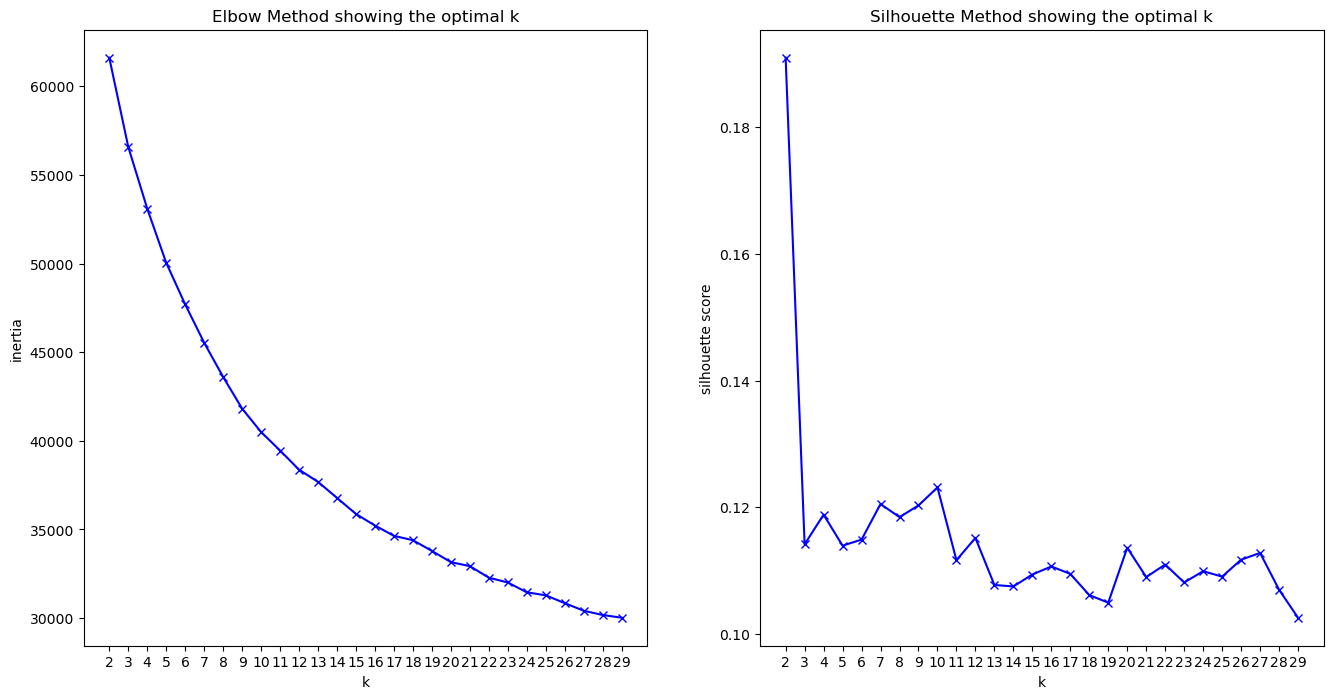

In [14]:
K = range(2, 30)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=2405,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')